# Wine Quality Visualization

## Introduction:
* In the winemaking industry, the quality of wine is assessed through a series of physicochemical and sensory tests. Laboratory tests are often used to characterize wine from numerous aspects, while sensory tests are performed by human experts, relying on human senses. Human analysis can be a final test for the ultimate quality of a wine. Physicochemical and sensory analysis are complex and are still not fully understood, however, it may be reasonable to hypothesize that physicochemical properties have an impact on human judgment.

* Collected from May 2004 to February 2007, this dataset, winequality-red.csv, is related to the red variant of the Portuguese “Vinho Verde” wine. The dataset contains ten physicochemical properties of red wine: fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. It also contains a human determined rating for quality for each sample, on a scale from (0-10)
 
With this project, we will try to answer the question: “Is the quality of wine affected by its acidity?”


## Preliminary exploratory data analysis:

### Reading the Libraries into JupyterHub

We will first start by loading the libraries we will be using in this proposal.

In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Loading Our Dataset into JupyterHub

Now that we have the libraries, we can start by loading our data into R and we will then add a column using mutate to show the number of rows. We then used select to put our new column as the first column.

In [3]:
dataset <- read_delim("data/winequality-red.csv",  delim = ";")  |>
           mutate(seq = seq(from = 1, to = 1599)) |>
           select(13,1:12)
dataset

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
dbl (12): fixed acidity, volatile acidity, citric acid, residual sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


seq,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
2,7.8,0.880,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
3,7.8,0.760,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
4,11.2,0.280,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
5,7.4,0.700,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
6,7.4,0.660,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5
7,7.9,0.600,0.06,1.6,0.069,15,59,0.9964,3.30,0.46,9.4,5
8,7.3,0.650,0.00,1.2,0.065,15,21,0.9946,3.39,0.47,10.0,7
9,7.8,0.580,0.02,2.0,0.073,9,18,0.9968,3.36,0.57,9.5,7


### Wrangling

This data is very difficult to work with so we'll start cleaning and wrangling our dataset. We first start by selecting the columns we require using the select function, then we will provide better column names for each. 
Lastly, we are creating a categorical dataset below by adding a new column using mutate which tells us that:
* Quality < 5 is low
* Quality of 5-6 is average
* Quality of > 6 is High

We will use as_factor() to make it a categorical variable

In [5]:
filtered_dataset <- dataset |>
                    select(seq ,"total sulfur dioxide", pH , quality) 

colnames(filtered_dataset) <- (c("seq", "total_sulfur_dioxide", "pH", "quality", "Grade"))


categorical_dataset <- filtered_dataset |>
                       mutate(Grade = case_when(quality < 5 ~ "Low",
                                 quality == 5 | quality == 6 ~ "Average",
                                 quality > 6 ~ "High",
                                 TRUE ~ "Very High")) |>
                       mutate(Grade = as_factor(Grade))
                                               

categorical_dataset

seq,total_sulfur_dioxide,pH,quality,Grade
<int>,<dbl>,<dbl>,<dbl>,<fct>
1,34,3.51,5,Average
2,67,3.20,5,Average
3,54,3.26,5,Average
4,60,3.16,6,Average
5,34,3.51,5,Average
6,40,3.51,5,Average
7,59,3.30,5,Average
8,21,3.39,7,High
9,18,3.36,7,High


### Removing The Outliers

The data above will give us a plot which is very clustered and therefore will be difficult to classify. To solve this problem and provide a cleaner graph, we will remove the outliers from our data using the Inter Quantile method.

In [6]:
#find Q1, Q3, and interquartile range for values in column total_sulfur_dioxide
Q1 <- quantile(categorical_dataset$total_sulfur_dioxide, .25)
Q3 <- quantile(categorical_dataset$total_sulfur_dioxide, .75)
IQR <- IQR(categorical_dataset$total_sulfur_dioxide)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers <- subset(categorical_dataset, categorical_dataset$total_sulfur_dioxide> (Q1 - 1.5*IQR) 
                      & categorical_dataset$total_sulfur_dioxide< (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers) 


#find Q1, Q3, and interquartile range for values in column pH
Q1 <- quantile(no_outliers$pH, .25)
Q3 <- quantile(no_outliers$pH, .75)
IQR <- IQR(no_outliers$pH)

#only keep rows in dataframe that have values within 1.5*IQR of Q1 and Q3
no_outliers_2 <- subset(no_outliers, no_outliers$pH > (Q1 - 1.5*IQR) 
                      & no_outliers$pH < (Q3 + 1.5*IQR))

#view row and column count of new data frame
dim(no_outliers_2) 

no_outliers_updated <- no_outliers |>
                       select(-quality)

no_outliers_updated
           

[1] 1541    5

[1] 1506    5

seq,total_sulfur_dioxide,pH,Grade
<int>,<dbl>,<dbl>,<fct>
1,34,3.51,Average
2,67,3.20,Average
3,54,3.26,Average
4,60,3.16,Average
5,34,3.51,Average
6,40,3.51,Average
7,59,3.30,Average
8,21,3.39,High
9,18,3.36,High


### Visualization       
Now that we have our tidy data and we are comparing two quantitave variables, we used a scatterplot. In addition, we put the color as Grade as it is the catergorical variable that we want to predict. We also added human readable axis labels.

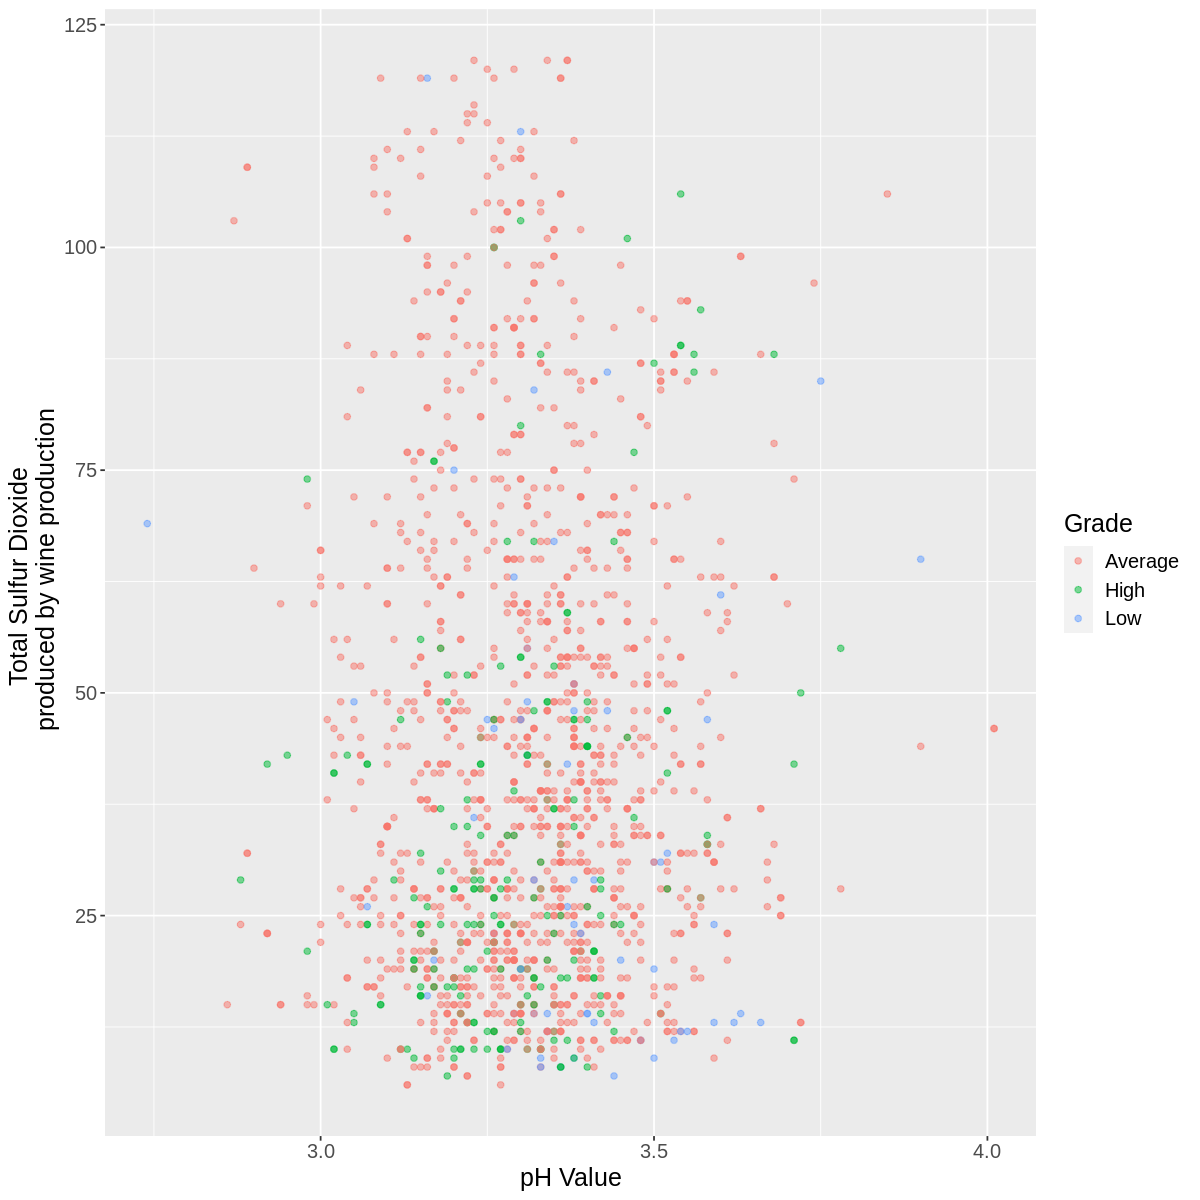

In [7]:
options(repr.plot.height = 10, repr.plot.width = 10)

wine_plot <- no_outliers_updated |>
             ggplot(aes(x = pH, y = total_sulfur_dioxide, color = Grade)) +
             geom_point(alpha = 0.5) +
             labs(x = "pH Value", y = "Total Sulfur Dioxide \n produced by wine production", 
                  color = "Grade") +
             theme(text = element_text(size = 15))
             
wine_plot

## Methods:
* We plan on answering our predictive question using a k-nearest neighbors classification model. We would generate a random point in the plot and observe its nearest neighbors to predict its Grade.
* We shall also standardize our variables to ensure fair comparison.
* Overall, since chapter 8 (regression II) has not been covered, we would decide after if regression fits our predictive question more than a classification model.

## Expected outcomes and significance:

### What do you expect to find?

We hypothesize red wines to have a pH ranging between 3.3 to 3.6 to be considered as good quality. High pH levels are susceptible to bacteria growth whereas low pH wines taste tart and crisp (Vinny, 2009). Moreover, high amounts of sulfur dioxide lead to unpleasant tastes and produce burning sensations when consumed. Therefore, we hypothesize the ideal level of sulfur dioxide to range around 25 mg/l for red wines.

 ### What impact could such findings have?

Health concerns associated with drinking include organ damage, sulfite reactions and weakened immune system (Sarkar, 2015) . In particular, sulfite reactions affect breathing, skin, and the digestive system depending on the consumer. These findings can link to the daily consumption of sulfur dioxides and the health effects associated with excessive intake of sulfur dioxide due to uncontrolled drinking. 

### What future questions could this lead to?

Future questions can explore the pH and sulfur dioxide levels of other types of wine or alcoholic beverages and compare the relative levels in specific types. Also, warmer temperatures transform the flavour of wine, posing future research in exploring the change of pH and sulfur dioxide levels in order to produce good quality wine.  

## Bibliography
 
* P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.
